# Compare learning curves between w/ grad clip and w/o grad clip

In [1]:
import wandb
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
sns.set_style("ticks")
sns.set_context("paper", 1.5, {"lines.linewidth": 2})

In [5]:
def get_return_from_wandb(model_name, env_name, seed, remove_grad):
    """Get mean return from wandb

    Args:
        model_name (str): 'gpt2', 'igpt', or 'dt'.
        env_name (str): 'hopper', 'halfcheetah', or 'walker2d'.
        seed (int): Random seed used for experiments.
        remove_grad (book): If True, return the results without grad clip.

    Returns:
        list:  mean return over epocs for K=20
    """    
    wandb_project_name = 'your_wandb_project_name'
    api = wandb.Api()
    runs = api.runs(
        path=wandb_project_name,
        filters={'state':'finished'}
        )

    if env_name == 'hopper':
        rtg_conditioning = 3600
    elif env_name == 'halfcheetah':
        rtg_conditioning = 6000
    elif env_name == 'walker2d':
        rtg_conditioning = 5000
    else:
        rtg_conditioning = None

    if remove_grad:
        for run in runs:
            if run.name == f'gym-experiment-{env_name}-medium-{model_name}-{seed}-no-grad-clip':
                break
        return_mean = run.history()[f'evaluation/target_{rtg_conditioning}_return_mean'][: 10]
        return return_mean
    else:
        for run in runs:
            if run.name == f'gym-experiment-{env_name}-medium-{model_name}-{seed}':
                break
        return_mean = run.history()[f'evaluation/target_{rtg_conditioning}_return_mean'][: 10]
        return return_mean


def get_action_error_from_wandb(model_name, env_name, seed, remove_grad):
    """Get action errors.

    Args:
        model_name (str): 'gpt2', 'igpt', or 'dt'.
        env_name (str): 'hopper', 'halfcheetah', or 'walker2d'.
        seed (int): Random seed used for experiments.
        remove_grad (book): If True, return the results without grad clip.

    Returns:
        list: action error over epocs for K=20
    """    
    wandb_project_name = 'your_wandb_project_name'
    api = wandb.Api()
    runs = api.runs(
        path=wandb_project_name,
        filters={'state':'finished'}
        )

    if remove_grad:
        for run in runs:
            if run.name == f'gym-experiment-{env_name}-medium-{model_name}-{seed}-no-grad-clip':
                break
        action_error = run.history()['training/action_error'][: 10]
        return action_error
    else:
        for run in runs:
            if run.name == f'gym-experiment-{env_name}-medium-{model_name}-{seed}':
                break
        action_error = run.history()['training/action_error'][: 10]
        return action_error
        

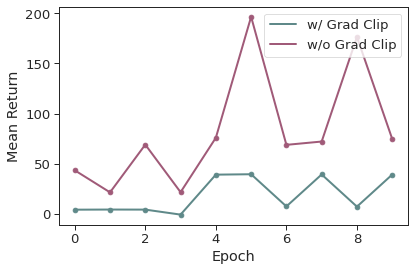

In [7]:
seed = 666
env_name = 'hopper'
model_name = 'igpt'
from_wandb = True
path_to_return = 'path_to_save_return'
path_to_save_figure = 'path_to_save_figure'

if from_wandb:
    return_mean = get_return_from_wandb(model_name, env_name, seed, remove_grad=False)
    return_mean_no_grad_clip = get_return_from_wandb(model_name, env_name, seed, remove_grad=True)
    np.save(f'{path_to_return}/returnmean_{model_name}_{env_name}_medium_{seed}.npy', return_mean)
    np.save(f'{path_to_return}/returnmean_{model_name}_no_grad_clip_{env_name}_medium_{seed}.npy', return_mean_no_grad_clip)
else:
    return_mean = np.load(f'{path_to_return}/returnmean_{model_name}_{env_name}_medium_{seed}.npy')
    return_mean_no_grad_clip = np.load(f'{path_to_return}/returnmean_{model_name}_no_grad_clip_{env_name}_medium_{seed}.npy')

plt.plot(return_mean, color=(0.372, 0.537, 0.537), label='w/ Grad Clip')
plt.scatter(np.arange(len(return_mean)), return_mean, color=(0.372, 0.537, 0.537))

plt.plot(return_mean_no_grad_clip, color=(0.627, 0.352, 0.470), label='w/o Grad Clip')
plt.scatter(np.arange(len(return_mean_no_grad_clip)), return_mean_no_grad_clip, color=(0.627, 0.352, 0.470))

plt.legend(loc='upper right')
plt.ylabel('Mean Return')
plt.xlabel('Epoch')
plt.tight_layout()
plt.savefig(f'{path_to_save_figure}/returnmean_{model_name}_grad_clip_{env_name}_medium_{seed}.pdf')
plt.show()

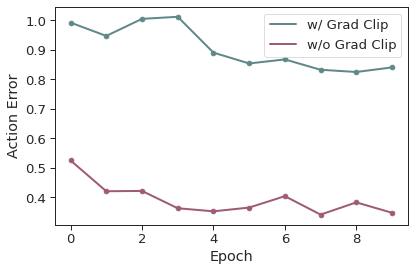

In [9]:
seed = 666
env_name = 'hopper'
model_name = 'igpt'
from_wandb = True
path_to_action_error = 'path_to_save_action_error'
path_to_save_figure = 'path_to_save_figure'

if from_wandb:
    action_error = get_action_error_from_wandb(model_name, env_name, seed, remove_grad=False)
    action_error_no_grad_clip = get_action_error_from_wandb(model_name, env_name, seed, remove_grad=True)
    np.save(f'{path_to_action_error}/action_error_{model_name}_{env_name}_medium_{seed}.npy', action_error)
    np.save(f'{path_to_action_error}/action_error_{model_name}_no_grad_clip_{env_name}_medium_{seed}.npy', action_error_no_grad_clip)
else:
    action_error = np.load(f'{path_to_action_error}/action_error_{model_name}_{env_name}_medium_{seed}.npy')
    action_error_no_grad_clip = np.load(f'{path_to_action_error}/action_error_{model_name}_no_grad_clip_{env_name}_medium_{seed}.npy')

plt.plot(action_error, color=(0.372, 0.537, 0.537), label='w/ Grad Clip')
plt.scatter(np.arange(len(action_error)), action_error, color=(0.372, 0.537, 0.537))

plt.plot(action_error_no_grad_clip, color=(0.627, 0.352, 0.470), label='w/o Grad Clip')
plt.scatter(np.arange(len(action_error_no_grad_clip)), action_error_no_grad_clip, color=(0.627, 0.352, 0.470))

plt.legend(loc='upper right')
plt.ylabel('Action Error')
plt.xlabel('Epoch')
plt.tight_layout()
plt.savefig(f'{path_to_save_figure}/action_error_{model_name}_grad_clip_{env_name}_medium_{seed}.pdf')
plt.show()